# Daniel Gómez Rámirez

Para esta actividad se va a evaluar un dataset para un caso real obtenido de una empresa relacionada con autobuses, por lo que se descartaran algunas columnas por criterio experto, ya que no aplican para el objetivo real que se pretende, y no afecta  al objetivo de la actividad.

In [1]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns

# para poder ver todas las columnas y filas 
pd.options.display.max_rows = 50
pd.options.display.max_columns = 60

# Carga de los datos

En el dataset taller:    
Obtenemos el error  ***"Expected 30 fields in line 76683, saw 32"***. que nos indica que hay filas con más columnas, que las columnas de la primera fila, la solución sería exportar los datos con un separación diferente a la "," o al ";". ya que hay apartados que contienen este caracter. como se han moduficado varias columnas manualmente pero sigue existiendo el error en diferentes filas, para este caso academico descartamos las lineas con este error.

In [2]:

ruta_taller=os.path.join("data",'taller_materiales.csv')
taller = pd.read_csv(ruta_taller, sep='|', index_col = False)#, on_bad_lines='skip')


In [3]:
ruta_vehiculo=os.path.join("data",'veh_flota.csv')
vehiculo = pd.read_csv(ruta_vehiculo, sep=';', index_col = False)#, on_bad_lines='skip')
#display(vehiculo)

# Analisis Dataset TALLER

sabemos que estas columnas  tienes tipos diferentes de datos las trataremos mas adelante si es necesario, por lo que podemos deducir que hay filas que no están correctamente declaradas

In [4]:
print(taller.shape)
taller.sample(5)

(189154, 30)


,anyparte,numparte,numlinea,descrip,cantidad,precio,importe,prove mat,nomartic,fec_alta,fecultcom,preciouc,ctr_stock,ctr_serie,ctr_rueda,nomalmac,prove art,nomfamia,nommarca,nomresid,nomunida,codigbus,fechaent,numkms,fechasal,siniestro,descripcion,mecanico,mecanico ape,cliente
100463,2017,1710287,1,LUNA LATERAL IZQUIERDA,1.0,1150.20,1150.20,CAVE TALLERES S.L.,LUNA LATERAL IZQUIERDA,2017-08-31,2020-04-27,980.0000,1,0,0,ALMACEN QUART,MOVIBUS SERVICE,LUNAS,NaN,NaN,UNIDADES,U111,2017-11-16,0,2017-11-16,1,LUNA LATERAL IZQUIEDA 2ª,NaN,NaN,"LA MARINA GANDIENSE, S.L."
163041,2021,2100933,1,ELECTROVALVULA 81521606115,1.0,65.00,65.00,EUROPART,ELECTROVALVULA 81521606115,2021-02-08,2021-02-08,65.0000,1,0,0,ALMACEN QUART,EUROPART,BOMBAS AGUA Y VALVULAS,NaN,NaN,UNIDADES,N185,2021-02-08,555886,2021-02-08,0,MATERIAL -ELECTROVÁLVULA-,NaN,NaN,"AUTOS VALLDUXENSE, S.L. ( A PARTIR 04/20"
110186,2018,1804824,4,TS CARTUCHO DE FILTRO MERCEDES,1.0,13.20,13.20,MERCEDES-BENZ VALENCIA,TS CARTUCHO DE FILTRO MERCEDES,2013-02-07,2022-02-14,16.3240,1,0,0,ALMACEN QUART,VALDISA,FILTROS,SIN ASIGNAR,NaN,UNIDADES,D112,2018-05-23,565250,2018-05-24,0,Mantenimiento,ESCRIBANO,ESCRIBANO ROMERO,"MEDTRAST 98, S.L."
136129,2019,1907970,1,TAPA EMPUÑADURA PALANCA CAMBIO VOLV,1.0,40.91,36.00,"COMERCIAL DE AUTOMOCION RUBIO, S.L.",TAPA EMPUÑADURA PALANCA CAMBIO VOLV,2008-10-02,2021-12-02,39.4768,1,0,0,ALMACEN QUART,"COMERCIAL DE AUTOMOCION RUBIO, S.L.",CARROCERIA,VOLVO,NaN,UNIDADES,T346,2019-08-30,362750,2019-08-30,0,MATERIAL-TAPA EMPUÑADURA PALANCA-INST.EMISORA-...,NaN,NaN,TRANSVIA S.L.
37608,2012,126027,1,PORTES,1.0,9.12,9.12,DHL EXPRES,PORTES,2013-03-07,2022-06-08,12.0000,1,0,0,ALMACEN QUART,"RS TURIA, S.L.",VARIOS,SIN ASIGNAR,NaN,UNIDADES,H106,2012-10-15,130009,2012-10-17,0,NaN,NaN,NaN,HERCA S.L.-AUTOCARES


con este codigo verificabamos el numero de columnas de las filas para buscar donde habia un error en la fila, en este caso concreto, se verificó que la fila 8 y 9 debian estar en la misma fila.

In [5]:
a='2016;1603791;1;IRFB3607PBF N-MOSFET UNIPOLAR HEXFET 75V;5.00;3.5000;17.50;ELECTRONICA GIMENO S.L.;IRFB3607PBF N-MOSFET UNIPOLAR HEXFET 75V;80A;2016-05-13;2016-05-13;3.500000;1;0;0;ALMACEN QUART;ELECTRONICA GIMENO S.L.;IMAGEN Y SONIDO;;;UNIDADES;U316;2016-05-13;273287;2016-05-13;0;MATERIAL -CONECTORES, MANDO A DISTANCIA Y VENTILADOR-;;;VIAJES TRANSVIA TOURS, S.L.'
a= pd.Series(a.split(";"))
print(len(a))
a

31


0                                                  2016
1                                               1603791
2                                                     1
3              IRFB3607PBF N-MOSFET UNIPOLAR HEXFET 75V
4                                                  5.00
5                                                3.5000
6                                                 17.50
7                               ELECTRONICA GIMENO S.L.
8              IRFB3607PBF N-MOSFET UNIPOLAR HEXFET 75V
9                                                   80A
10                                           2016-05-13
11                                           2016-05-13
12                                             3.500000
13                                                    1
14                                                    0
15                                                    0
16                                        ALMACEN QUART
17                              ELECTRONICA GIME

buscamos registros duplicados y vemos que para el dataset taller hay 0

In [6]:
print(taller.duplicated().sum())

0


## Missings
buscamos  los missings para el dataset taller

In [7]:
missing_taller=taller.isna().sum()/len(taller)*100
missing_taller=pd.DataFrame(missing_taller)
missing_taller

,0
anyparte,0.000000
numparte,0.000000
numlinea,0.000000
descrip,0.000000
cantidad,0.000000
precio,0.000000
importe,0.000000
prove mat,0.312444
nomartic,0.000000
fec_alta,0.000000


In [8]:


#missing_taller['indice']=range(len(missing_taller))
#missing_taller.set_index('indice')
#missing_taller.reset_index(inplace=True)
#missing_taller = missing_taller.rename(columns = {'index':'columnas'})
#missing_taller = missing_taller.rename(columns = {0:'missings'})


creamos una función apra hacer el plot de el % missings por columna ya que lo vamos a aplicar a varios datasets.

In [9]:
def plot_miss(data):
    sice_x=10 if len (data) >30 else 6
    # print(len(data))
    #print(sice_x)
    sns.set_theme(style="whitegrid")
    plt.figure(figsize = (12,sice_x))
    sns.set_color_codes("muted")
    
    ax = sns.barplot( x=0, y=data.index, data=data).set(title='% de Missings por columna')
    #ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
   
    plt.xlabel('% Missings')
    plt.ylabel('Columnas')
    plt.show()
     

Mostramos de forma grafia el porcentaje de missings

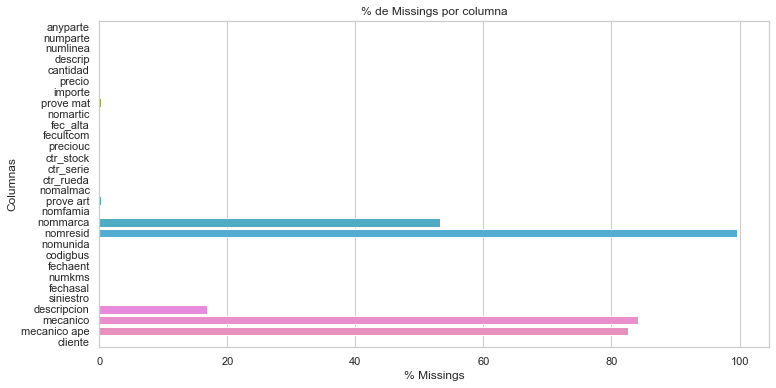

In [10]:
plot_miss(missing_taller)

consultamos lso tipos asignados por Pandas al dataframe

In [11]:
taller.dtypes

anyparte          int64
numparte          int64
numlinea          int64
descrip          object
cantidad        float64
precio          float64
importe         float64
prove mat        object
nomartic         object
fec_alta         object
fecultcom        object
preciouc        float64
ctr_stock         int64
ctr_serie         int64
ctr_rueda         int64
nomalmac         object
prove art        object
nomfamia         object
nommarca         object
nomresid         object
nomunida         object
codigbus         object
fechaent         object
numkms            int64
fechasal         object
siniestro         int64
descripcion      object
mecanico         object
mecanico ape     object
cliente          object
dtype: object

### Seleccionamos columnas
seleccioanmos las columnas


In [12]:
features_taller=['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'fecultcom', 'preciouc',
       'ctr_stock', 'nomalmac', 'prove art',
       'nomfamia', 'nomunida', 'codigbus', 'fechaent',
       'numkms', 'fechasal', 'siniestro', 'descripcion','cliente']
taller= taller[features_taller]

imputar 'Sin asignar' a los missings de las columnas prove mat','prove art','cliente','descripcion'
 y 0 a la columna preciouc

In [13]:
 

taller['preciouc']=np.where((taller['preciouc'].isna()) ,0, taller['preciouc'])

columnas=['prove mat','prove art','cliente','descripcion']
for columna in columnas:
    taller[columna]=np.where((taller['prove mat'].isna()) ,'SIN ASIGNAR', taller['prove mat'])



creamos una función para poder corregir los errores, que se han visto en las columnas de fechas en  ambos datasets.    
Esta función se ha ido actualizando para los errores que se han ido encontrando    
Como vamos a trabajar con fechas importamos datetime para poder asiganar el tipo fecha.

In [14]:
from datetime import datetime, timedelta

In [15]:

def norm_fecha (columna):

    fecha = columna.str.split(pat = '-', expand = True)
    
    # verificar si 0201 es 2001 o 2021
    fechas=[
            # añadidas para el data set taller para als 3 columnas
            ['0011','2011'],['0012','2012'],['2200','2020'],
            ['1948','2018'],['3200','2020'],['2200','2020'],
            ['2201','2021'],['3011','2011'],['2301','2021'],
            ['8201','2021'],['0201','2001'],['0212','2012'],
            ['1912','2012'],['9201','2021'],['2048','2018'],
            ['2047','2017'],['2107','2017'],['2044','2011'],
            ['2029','2020'],
            #añadidas para el data set vehiculo columna 'fechamat'
            #['0',np.nan],['65','1965'],['0000',np.nan],
            #['63','1963'],['59','1959'],['23','2022'],
            #['54','1954'],['0001','2001'],
        
            ['0',np.nan],['65',np.nan],['0000',np.nan],
            ['63',np.nan],['59',np.nan],['23',np.nan],
            ['54',np.nan],['0001','2001'],
            #añadidas para el data set vehiculo columna 'matriculacion_planner'
            ['34',np.nan],['19',np.nan],['43',np.nan],
            ['24',np.nan],['39',np.nan],['40',np.nan],
            ['55',np.nan],['25',np.nan],['50',np.nan],
            ['35',np.nan],['22',np.nan],['71',np.nan],
            ['53',np.nan],['61',np.nan],['47',np.nan],
            ['15',np.nan],['31',np.nan],['8',np.nan],
            ['12',np.nan],['9',np.nan],['18',np.nan],
            ['13',np.nan],['28',np.nan],['56',np.nan],
            ['26',np.nan],['4',np.nan],['5',np.nan]

           ]
    
    for f,f1 in fechas:
        fecha[0]=np.where((fecha[0]==f) ,f1, fecha[0])

    
    colum_fecha=fecha[0]+'-'+fecha[1]+'-'+fecha[2]     
    fecha_year=pd.unique(fecha[0])
    return  colum_fecha, fecha_year, fecha[0]


def cuentaNAN(fecha_a):
    fecha_b=pd.DataFrame(fecha_a[:1])
    fecha_b = fecha_b.transpose()
    print('Fechas')
    print(f'cantidad de registros: {fecha_b.count()}')
    print(f'cantidad de MISSINGS: {fecha_b.isna().sum()}')
    print(f'Porcentaje de MISSINGS: {fecha_b.isna().sum()/len(fecha_b)*100}')

verificamos los valores unicos de las columnas, fechas, pudiendo añadir los valores atipicos a la lista fechas de la función anterior

In [16]:
fecha_a= norm_fecha(taller['fec_alta'])
fecha_a[1]

array(['2012', '2010', '2009', '2011', '2007', '2008', '2013', '2019',
       '2006', '2020', '2021', '2001', '2018', '2014', '2017', '2015',
       '2016', '2005', '2004', '2003', '2022'], dtype=object)

In [17]:
cuentaNAN(fecha_a)

Fechas
cantidad de registros: 0    189154
dtype: int64
cantidad de MISSINGS: 0    0
dtype: int64
Porcentaje de MISSINGS: 0    0.0
dtype: float64


In [18]:
taller['fec_alta']=fecha_a[0]
taller['fec_alta'] = pd.to_datetime(taller['fec_alta'], format='%Y-%m-%d')

In [19]:
fecha_a= norm_fecha(taller['fecultcom'])
fecha_a[1]

array(['2020', '2010', '2022', '2017', '2019', '2011', '2007', '2021',
       '2009', '2015', '2018', '2008', '2013', '2016', '2012', '2014',
       '2006', nan, '2001', '2005', '2004'], dtype=object)

In [20]:
cuentaNAN(fecha_a)

Fechas
cantidad de registros: 0    188943
dtype: int64
cantidad de MISSINGS: 0    211
dtype: int64
Porcentaje de MISSINGS: 0    0.111549
dtype: float64


In [21]:
taller['fecultcom']=fecha_a[0]
taller['fecultcom'] = pd.to_datetime(taller['fecultcom'], format='%Y-%m-%d')

In [22]:
fecha_a= norm_fecha(taller['fechasal'])
fecha_a[1]

array(['2007', '2008', '2013', '2009', '2010', '2011', '2012', nan,
       '2014', '2021', '2015', '2016', '2017', '2018', '2019', '2020',
       '2022'], dtype=object)

In [23]:
cuentaNAN(fecha_a)

Fechas
cantidad de registros: 0    189030
dtype: int64
cantidad de MISSINGS: 0    124
dtype: int64
Porcentaje de MISSINGS: 0    0.065555
dtype: float64


In [24]:
taller['fechasal']=fecha_a[0]
taller['fechasal'] = pd.to_datetime(taller['fechasal'], format='%Y-%m-%d')

In [25]:
fecha_a= norm_fecha(taller['fechaent'])
fecha_a[1]

array(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype=object)

In [26]:
cuentaNAN(fecha_a)

Fechas
cantidad de registros: 0    189154
dtype: int64
cantidad de MISSINGS: 0    0
dtype: int64
Porcentaje de MISSINGS: 0    0.0
dtype: float64


In [27]:
taller['fechaent']=fecha_a[0]
taller['fechaent'] = pd.to_datetime(taller['fechaent'], format='%Y-%m-%d')

In [28]:
#taller['anyparte'] = pd.to_datetime(taller['anyparte'], format='%Y')

In [29]:
taller.dtypes


anyparte                int64
numparte                int64
numlinea                int64
descrip                object
cantidad              float64
precio                float64
importe               float64
prove mat              object
nomartic               object
fec_alta       datetime64[ns]
fecultcom      datetime64[ns]
preciouc              float64
ctr_stock               int64
nomalmac               object
prove art              object
nomfamia               object
nomunida               object
codigbus               object
fechaent       datetime64[ns]
numkms                  int64
fechasal       datetime64[ns]
siniestro               int64
descripcion            object
cliente                object
dtype: object

In [30]:
fechas=taller.select_dtypes(include=np.datetime64)

col_date_taller=taller.select_dtypes(include=np.datetime64).columns.tolist()
col_date_taller


['fec_alta', 'fecultcom', 'fechaent', 'fechasal']

In [31]:
taller.isna().sum()/len(taller)*100

anyparte       0.000000
numparte       0.000000
numlinea       0.000000
descrip        0.000000
cantidad       0.000000
precio         0.000000
importe        0.000000
prove mat      0.000000
nomartic       0.000000
fec_alta       0.000000
fecultcom      0.111549
preciouc       0.000000
ctr_stock      0.000000
nomalmac       0.000000
prove art      0.000000
nomfamia       0.000000
nomunida       0.000000
codigbus       0.000000
fechaent       0.000000
numkms         0.000000
fechasal       0.065555
siniestro      0.000000
descripcion    0.000000
cliente        0.000000
dtype: float64

In [32]:
taller.columns

Index(['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'fecultcom', 'preciouc',
       'ctr_stock', 'nomalmac', 'prove art', 'nomfamia', 'nomunida',
       'codigbus', 'fechaent', 'numkms', 'fechasal', 'siniestro',
       'descripcion', 'cliente'],
      dtype='object')

## Correlaciones
Creamos una función que  muestre las correlaciones ya que mas adelante la usaremos otra vez.

In [33]:
def correlaciones(df):
    sice_x=15 if len (df.columns) >30 else 10
    sice_y=10 if len (df.columns) >30 else 6
    plt.figure(figsize=(sice_x,  sice_y))
    # define the mask to set the values in the upper triangle to True
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    heatmap = sns.heatmap(round(df.corr(),2), mask=mask, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
    heatmap.set_title('Triangulo de Correlaciones Heatmap', fontdict={'fontsize':18}, pad=16)

mostramos las correlaciones que hay en el dataset taller

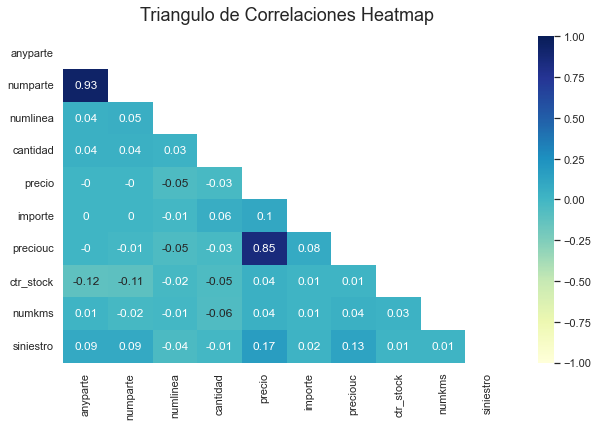

In [34]:
correlaciones(taller)

se peud eevr que las correlaciones mas destacables apra etse data set son  numparte con anyparte y precio con preciouc

Verificamos valores unicos para algunas de las columnas

In [35]:
pd.unique(taller['ctr_stock'])

array([0, 1], dtype=int64)

In [36]:
pd.unique(taller['anyparte'])

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022], dtype=int64)

In [37]:
pd.unique(taller['siniestro'])

array([0, 1], dtype=int64)

## Relaciones entre pares de variables

In [38]:
#sns.pairplot(taller, hue='nomfamia')
#plt.show()

# Analisis Dataset VEHICULOS

In [39]:
print(vehiculo.shape)
vehiculo.sample(5)


(1532, 38)


,id_vehiculo,codigbus,matricul,fechamat,matriculacion_planner,edad,numempre,nomempre,bastidor,capacidad,paxdepie,paxsentados,paxpmr,plat_pmr,WC,autoport,marca,modelo,carrocero,categoria,clase,longitud,numcv,tara,cilindrada,potencia,nvl_emisiones,escolar,tipo,subtipo,uso,tall_kilom,tal_feckm,totkilom,activo,dns_vehiculo,dispositivo,combustible
1219,1098.0,30287,8227LMF,2021-01-18,2021-01-18,1.0,92,Ambulancias Autónomas,WFOEXXTTRELD86409,9,NaN,5,1,NaN,NaN,NaN,NaN,NaN,INDUSAUTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMBULANCIA TIPO A,TNA A2,BASIC_FLEET,NaN,NaN,19226.0,1.0,ambulancias,NaN,NaN
611,521.0,AVS0188,0505BWN,2002-05-29,2002-05-28,19.0,79,AVSA,NaN,21,9,11,1,Si,No,No,MERCEDES BENZ,CIDADE I,UNVI,NaN,A,7.04,NaN,3100,2148,95,NaN,No,Urbano,Microbus,NaN,NaN,NaN,0.0,1.0,avsa,NaN,Diésel
751,661.0,20073,1308JJP,2015-10-22,2015-10-22,7.0,93,Ambulancias Edetanas,WF0XXXTTGXEP64802,9,0,9,0,NaN,NaN,NaN,FORD,TRANSIT,INDUSAUTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMBULANCIA TIPO A,TNA A2,BASIC_FLEET,NaN,2022-04-20 00:00:00,258406.0,1.0,ambulancias,NaN,NaN
291,244.0,T546,1030FPN,2007-05-18,2007-05-18,15.0,2,Transvia,WDD2211561A146774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERCEDES BENZ,S 350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURISMO,NaN,NaN,72500.0,2017-12-12 00:00:00,1085200.0,1.0,transvia,NaN,NaN
1211,1091.0,RLL11,6252KVZ,2019-04-05,2019-04-05,3.0,2,Transvia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPEL,CORSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURISMO,NaN,DISCRECIONAL,NaN,NaN,0.0,1.0,transvia,NaN,NaN


Buscamos duplicados y los eliminamos

In [40]:
print(vehiculo.duplicated().sum())

34


In [41]:
vehiculo=vehiculo.drop_duplicates()

In [42]:
print(vehiculo.duplicated().sum())

0


## Missing
observamos los missings y los graficamos

In [43]:
missing_vehiculo=vehiculo.isna().sum()/len(taller)*100
missing_vehiculo=pd.DataFrame(missing_vehiculo)
missing_vehiculo

,0
id_vehiculo,0.057096
codigbus,0.006873
matricul,0.013745
fechamat,0.069256
matriculacion_planner,0.075600
edad,0.080358
numempre,0.048638
nomempre,0.052867
bastidor,0.192436
capacidad,0.213054


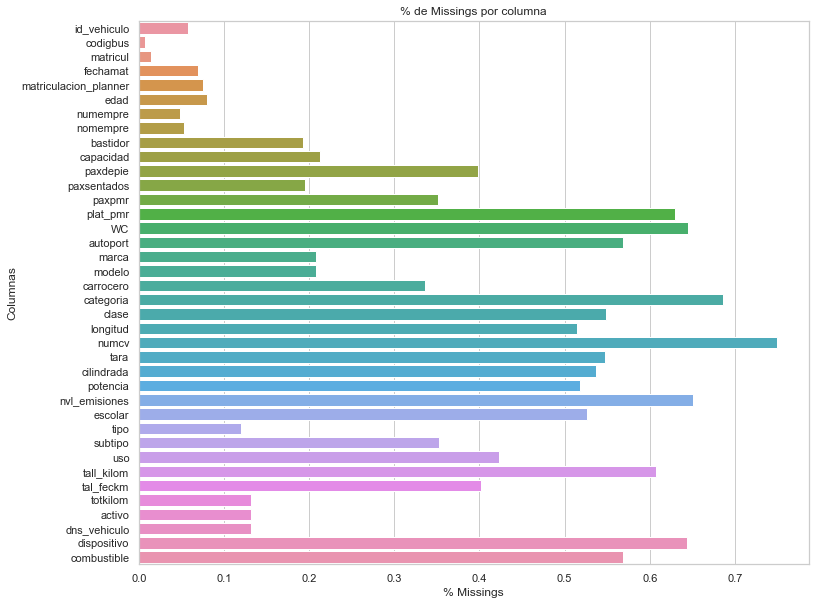

In [44]:
plot_miss(missing_vehiculo)

vemos los tipos  que asignado pandas a cada columna

In [45]:
vehiculo.dtypes

id_vehiculo              float64
codigbus                  object
matricul                  object
fechamat                  object
matriculacion_planner     object
edad                     float64
numempre                  object
nomempre                  object
bastidor                  object
capacidad                 object
paxdepie                  object
paxsentados               object
paxpmr                    object
plat_pmr                  object
WC                        object
autoport                  object
marca                     object
modelo                    object
carrocero                 object
categoria                 object
clase                     object
longitud                  object
numcv                     object
tara                      object
cilindrada                object
potencia                  object
nvl_emisiones             object
escolar                   object
tipo                      object
subtipo                   object
uso       

### Seleccion de columnas

elegimos las caracteristicas que nos interesan

In [46]:
vehiculo.columns

Index(['id_vehiculo', 'codigbus', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 'bastidor',
       'capacidad', 'paxdepie', 'paxsentados', 'paxpmr', 'plat_pmr', 'WC',
       'autoport', 'marca', 'modelo', 'carrocero', 'categoria', 'clase',
       'longitud', 'numcv', 'tara', 'cilindrada', 'potencia', 'nvl_emisiones',
       'escolar', 'tipo', 'subtipo', 'uso', 'tall_kilom', 'tal_feckm',
       'totkilom', 'activo', 'dns_vehiculo', 'dispositivo', 'combustible'],
      dtype='object')

In [47]:
features_vehiculos=['id_vehiculo', 'codigbus', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 
       'marca', 'modelo', 'carrocero','tipo',
       'totkilom', 'dns_vehiculo']

In [48]:
vehiculo= vehiculo[features_vehiculos]

eliminar  missings de id vehiculo, y codigbus , e imputar 'sin asignar' al resto

In [49]:
#vehiculo = vehiculo.dropna(subset=['codigbus'])
vehiculo = vehiculo[vehiculo['codigbus'].notna()]
vehiculo = vehiculo[vehiculo['id_vehiculo'].notna()]
#vehiculo = vehiculo[vehiculo[['id_vehiculo','codigbus']].notna()]

In [50]:
pd.unique(vehiculo['numempre'])

array(['3', '19', '2', '31', '4', '6', '10', '17', '15', '8', '16', '43',
       '45', '44', '46', '47', '67', '69', '70', '68', '57', '72', '79',
       '80', '83', '84', '93', '92', '94', '96', '95', '97', '120', '121',
       '117', '138', '135', '139', '140'], dtype=object)

In [51]:
vehiculo.shape

(1390, 14)

In [52]:
vehiculo.dtypes

id_vehiculo              float64
codigbus                  object
matricul                  object
fechamat                  object
matriculacion_planner     object
edad                     float64
numempre                  object
nomempre                  object
marca                     object
modelo                    object
carrocero                 object
tipo                      object
totkilom                 float64
dns_vehiculo              object
dtype: object

asiganamos el valor -1 para los missings de 'edad', 'numempre', 'totkilom'

asiganamos el 'sin registro' para los missings de 'matricul','nomempre', 'marca','modelo', 'carrocero', 'tipo', 'dns_vehiculo'

In [53]:
#vehiculo['id_vehiculo']=np.where((vehiculo['id_vehiculo'].isna()) ,0, vehiculo['id_vehiculo'])

columnas=[ 'edad', 'numempre', 'totkilom']
for columna in columnas : 
    vehiculo[columna]=np.where((vehiculo[columna].isna()) ,-1, vehiculo[columna])

#palabras=['ZARAG','Si','No']
#for palabra in palabras:
#    vehiculo['numempre']=np.where((vehiculo['numempre'].str.contains(palabra)) ,-1, vehiculo['numempre'])
#vehiculo['numempre'] = vehiculo['numempre'].astype(float)

columnas=[ 'matricul','nomempre', 'marca','modelo', 'carrocero', 'tipo', 'dns_vehiculo']
for columna in columnas :   
    vehiculo[columna]=np.where((vehiculo[columna].isna()) ,'SIN ASIGNAR', vehiculo[columna])


In [54]:
vehiculo.columns

Index(['id_vehiculo', 'codigbus', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 'marca',
       'modelo', 'carrocero', 'tipo', 'totkilom', 'dns_vehiculo'],
      dtype='object')

comprobamos valores unicos, que tengan sentido

In [55]:
pd.unique(vehiculo['edad'])

array([ 3.,  6.,  5.,  7., 14.,  8., 18., 12., 19., -1., 16., 13.,  9.,
        4., 11., 10., 29., 20., 32., 30., 73., 64., 44., 43., 22., 17.,
       15., 31., 25., 38., 27., 42., 39., 63., 21., 34., 28., 24.,  2.,
        1., 26., 23.,  0., 37., 40.])

In [56]:
vehiculo.isna().sum()/len(taller)*100

id_vehiculo              0.000000
codigbus                 0.000000
matricul                 0.000000
fechamat                 0.054453
matriculacion_planner    0.063969
edad                     0.000000
numempre                 0.000000
nomempre                 0.000000
marca                    0.000000
modelo                   0.000000
carrocero                0.000000
tipo                     0.000000
totkilom                 0.000000
dns_vehiculo             0.000000
dtype: float64

vemos que hay matriculas que no correspondenal formato de una matricula y que hay matriculas de diferentes formatos

In [57]:
vehiculo['matricul'].tail(30)

1502    6269KLH
1503    5791KLS
1504    3252KRB
1505        FVL
1506    7371LXF
1507    7122LXD
1508    8440CBC
1509    7238GYM
1510    8456HKM
1511    3459HRG
1512    2533HMG
1513    7794DXW
1514    2535HMG
1515    3277HMG
1516      RIZAO
1517    5290BKY
1518    6583FDL
1519    6792GTW
1520    7156FYC
1521    1663GZJ
1522    6652JVL
1523    5791KLS
1524    7156FYC
1525    4794JJH
1526    7140LYB
1527    6312FZT
1528    1694HNR
1529    8156JWS
1530    1983HST
1531    7140LYB
Name: matricul, dtype: object

creamos un filtro que deja las matricuals  que son alfanumericas en las posiciones designadas que coinciden con los dos tipos de formatos de matricula que se ha visto en el datase

tipo 1 : X0000XX    
tipo 2 : 0000XXX

In [58]:
vehiculo['matricul']=np.where((vehiculo['matricul'].str[1:-3].str.isnumeric() & 
                               vehiculo['matricul'].str[-2:].str.isalpha())
                              ,vehiculo['matricul'],'SIN ASIGNAR')

In [59]:
vehiculo['matricul'].tail(30)

1502        6269KLH
1503        5791KLS
1504        3252KRB
1505    SIN ASIGNAR
1506        7371LXF
1507        7122LXD
1508        8440CBC
1509        7238GYM
1510        8456HKM
1511        3459HRG
1512        2533HMG
1513        7794DXW
1514        2535HMG
1515        3277HMG
1516    SIN ASIGNAR
1517        5290BKY
1518        6583FDL
1519        6792GTW
1520        7156FYC
1521        1663GZJ
1522        6652JVL
1523        5791KLS
1524        7156FYC
1525        4794JJH
1526        7140LYB
1527        6312FZT
1528        1694HNR
1529        8156JWS
1530        1983HST
1531        7140LYB
Name: matricul, dtype: object

pasamos la función anteriormente creada para las columnas de fechas, añadiendo a la lista las fechas que corresponda 

In [60]:
fecha_a= norm_fecha(vehiculo['fechamat'])
fecha_a[1]

array(['2019', '2016', '2017', '2015', '2008', '2014', '2004', '2010',
       '2003', nan, '2006', '2009', '2013', '2018', '2011', '2012',
       '1993', '2002', '1990', '1992', '1949', '1958', '1978', '1979',
       '2000', '2001', '2005', '2007', '1991', '1997', '1984', '1995',
       '1980', '1983', '1959', '1988', '1994', '1998', '2020', '1996',
       '1999', '2021', '1985', '1982', '2022'], dtype=object)

In [61]:
cuentaNAN(fecha_a)    

Fechas
cantidad de registros: 0    1286
dtype: int64
cantidad de MISSINGS: 0    104
dtype: int64
Porcentaje de MISSINGS: 0    7.482014
dtype: float64


asignamos los valores modificados a la columna de fecha y le asignamos el typo fecha

In [62]:
vehiculo['fechamat']=fecha_a[0]
vehiculo['fechamat'] = pd.to_datetime(vehiculo['fechamat'], format='%Y-%m-%d')

In [63]:
pd.unique(vehiculo['numempre'])

array(['3', '19', '2', '31', '4', '6', '10', '17', '15', '8', '16', '43',
       '45', '44', '46', '47', '67', '69', '70', '68', '57', '72', '79',
       '80', '83', '84', '93', '92', '94', '96', '95', '97', '120', '121',
       '117', '138', '135', '139', '140'], dtype=object)

In [64]:
fecha_a= norm_fecha(vehiculo['matriculacion_planner'])
fecha_a[1]

array(['2019', '2016', '2017', '2015', '2008', '2014', '2004', '2010',
       '2003', nan, '2006', '2009', '2013', '2018', '2011', '2012',
       '1993', '2002', '1990', '1992', '1949', '1958', '1978', '1979',
       '2000', '2005', '2007', '1991', '1997', '1984', '1995', '1980',
       '1983', '1959', '2001', '1988', '1994', '1998', '2020', '1996',
       '1999', '2021', '1985', '1982', '2022'], dtype=object)

In [65]:
cuentaNAN(fecha_a) 

Fechas
cantidad de registros: 0    1269
dtype: int64
cantidad de MISSINGS: 0    121
dtype: int64
Porcentaje de MISSINGS: 0    8.705036
dtype: float64


asignamos los valores modificados a la columna de fecha y le asignamos el typo fecha

In [66]:
vehiculo['matriculacion_planner']=fecha_a[0]
vehiculo['matriculacion_planner'] = pd.to_datetime(vehiculo['matriculacion_planner'], format='%Y-%m-%d')

In [67]:
fechas=vehiculo.select_dtypes(include=np.datetime64)

col_date=vehiculo.select_dtypes(include=np.datetime64).columns.tolist()
col_date

['fechamat', 'matriculacion_planner']

comprobamos que los tipos son lso correctos

In [68]:
vehiculo.dtypes

id_vehiculo                     float64
codigbus                         object
matricul                         object
fechamat                 datetime64[ns]
matriculacion_planner    datetime64[ns]
edad                            float64
numempre                         object
nomempre                         object
marca                            object
modelo                           object
carrocero                        object
tipo                             object
totkilom                        float64
dns_vehiculo                     object
dtype: object

In [69]:
vehiculo.isna().sum()/len(taller)*100

id_vehiculo              0.000000
codigbus                 0.000000
matricul                 0.000000
fechamat                 0.054982
matriculacion_planner    0.063969
edad                     0.000000
numempre                 0.000000
nomempre                 0.000000
marca                    0.000000
modelo                   0.000000
carrocero                0.000000
tipo                     0.000000
totkilom                 0.000000
dns_vehiculo             0.000000
dtype: float64

In [70]:
vehiculo.sample(5)

,id_vehiculo,codigbus,matricul,fechamat,matriculacion_planner,edad,numempre,nomempre,marca,modelo,carrocero,tipo,totkilom,dns_vehiculo
1068,959.0,T240,4193JVY,2016-12-30,2016-12-30,5.0,117,Transvia Toledo,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,MICROBUS,2000000.0,tviacentro
999,891.0,F163,4986FBZ,2006-06-26,2006-06-26,16.0,95,Fernanbus,SCANIA,CS40 CITY II,CASTROSUA,Urbano,299362092.0,fernanbus
579,489.0,G061,4700GSF,2009-12-07,2009-12-07,12.0,72,La Marina Gandiense,MAN,CITTOUR,NOGE,Urbano,2415478.0,lamarina
1071,962.0,T245,2276HBJ,2011-01-12,2011-01-12,11.0,117,Transvia Toledo,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,AUTOBUS,2565793.0,tviacentro
771,681.0,20097,0427KLC,2018-05-23,2018-05-23,4.0,93,Ambulancias Edetanas,FORD,TRANSIT,INDUSAUTO,AMBULANCIA TIPO A,329210.0,ambulancias


comprobamos las correlaciones que hay en el data set vehiculo, vemos que no son muy altes

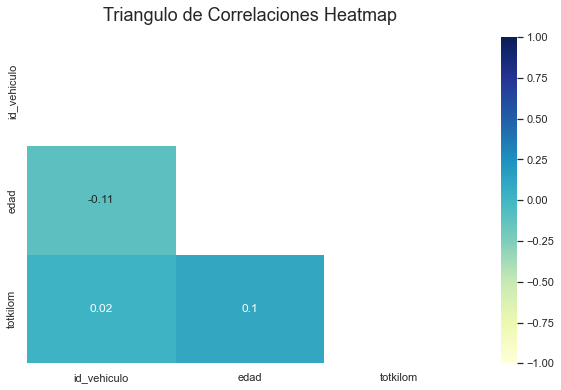

In [71]:
correlaciones(vehiculo)

# Combinar Datasets

comprobamos que las columnas por las que vamos a juntar los data sets  tienen valores iguales

In [72]:
codigbus_taller = pd.unique(taller['codigbus'])
print(len(codigbus_taller))
print(type(codigbus_taller))

1327
<class 'numpy.ndarray'>


In [73]:
codigbus_vehiculo = pd.unique(vehiculo['codigbus'])
print(len(codigbus_vehiculo))

1373


In [74]:
print(codigbus_taller)
print(codigbus_vehiculo)

['B078' 'B128' 'B131' ... 'T376' 'T379' 'RMA108']
['1000' '1001' '1002' ... 'T380' 'B191' 'R104']


In [75]:
codigbus_taller=pd.Series(codigbus_taller)
codigbus_taller.isna().sum()

0

In [76]:
codigbus_vehiculo=pd.Series(codigbus_vehiculo)
codigbus_vehiculo.isna().sum()

0

In [77]:
#codigbus_vehiculo=codigbus_vehiculo.dropna()
#codigbus_vehiculo.isna().sum()

In [78]:
codigbus_comun=np.intersect1d(codigbus_taller,codigbus_vehiculo)
codigbus_comun

array(['20052', '20063', '222', '236', '23LT', '30178', '30185', '30252',
       '30295', '54HC', '58HC', '61HC', '63HC', '63LT', '66LT', '67HC',
       '69HC', '70HC', '71HC', '72HC', '73HC', '75HC', '76HC', '77HC',
       '78HC', '79HC', '80HC', '81HC', '82HC', '83HC', '84HC', 'A102',
       'A107', 'A109', 'A110', 'A114', 'A115', 'A124', 'A125', 'A358',
       'B009', 'B011', 'B114', 'B116', 'B117', 'B119', 'B127', 'B129',
       'B130', 'B132', 'B133', 'B135', 'B137', 'B145', 'B146', 'B148',
       'B150', 'B152', 'B153', 'B155', 'B156', 'B158', 'B160', 'B161',
       'B162', 'B164', 'B165', 'B166', 'B168', 'B169', 'B170', 'B171',
       'B172', 'B173', 'B174', 'B175', 'B176', 'B177', 'B178', 'B179',
       'B180', 'B181', 'B182', 'B183', 'B184', 'B185', 'B186', 'B187',
       'B188', 'B189', 'B191', 'C084', 'C086', 'C087', 'C088', 'C091',
       'C092', 'C094', 'C095', 'C098', 'C099', 'C101', 'C102', 'C103',
       'C104', 'C105', 'C106', 'C107', 'C108', 'C109', 'D101', 'D112',
  

comprobamos que las columnas por las que vamos a juntar los data sets  tienes valores iguales

vemos que el número de observaciones comunes:

In [79]:
#len(np.intersect1d(codigbus_taller,codigbus_vehiculo))
len(codigbus_comun)

479

In [80]:
taller.columns

Index(['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'fecultcom', 'preciouc',
       'ctr_stock', 'nomalmac', 'prove art', 'nomfamia', 'nomunida',
       'codigbus', 'fechaent', 'numkms', 'fechasal', 'siniestro',
       'descripcion', 'cliente'],
      dtype='object')

In [81]:
vehiculo.columns

Index(['id_vehiculo', 'codigbus', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 'marca',
       'modelo', 'carrocero', 'tipo', 'totkilom', 'dns_vehiculo'],
      dtype='object')

hacemos un inner join  para tener las filas con toda la información

In [82]:
#df= taller.merge(vehiculo, how='left', on='codigbus')
df= taller.merge(vehiculo, how='inner', on='codigbus')
print(df.shape)



(99282, 37)


In [83]:
df.columns

Index(['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'fecultcom', 'preciouc',
       'ctr_stock', 'nomalmac', 'prove art', 'nomfamia', 'nomunida',
       'codigbus', 'fechaent', 'numkms', 'fechasal', 'siniestro',
       'descripcion', 'cliente', 'id_vehiculo', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 'marca',
       'modelo', 'carrocero', 'tipo', 'totkilom', 'dns_vehiculo'],
      dtype='object')

In [84]:
df.sample(5)

,anyparte,numparte,numlinea,descrip,cantidad,precio,importe,prove mat,nomartic,fec_alta,fecultcom,preciouc,ctr_stock,nomalmac,prove art,nomfamia,nomunida,codigbus,fechaent,numkms,fechasal,siniestro,descripcion,cliente,id_vehiculo,matricul,fechamat,matriculacion_planner,edad,numempre,nomempre,marca,modelo,carrocero,tipo,totkilom,dns_vehiculo
43867,2018,1801823,1,PLACA FRENO,1.0,80.850,80.85,EUROPART,PLACA FRENO,2013-03-01,2022-05-20,73.5000,1,ALMACEN QUART,EUROPART,FRENOS,UNIDADES,H100,2018-02-26,712539,2018-02-27,0,EUROPART,EUROPART,350.0,4083GSF,2009-12-07,2009-12-07,13.0,44,Herca,MAN,CITTOUR,NOGE,Urbano,2756748.0,bunyol
4952,2013,132339,1,CORREA ALTERNADOR SCANIA,1.0,61.790,53.76,"SCANIA SCAVALENCIA, S.A.",CORREA ALTERNADOR SCANIA,2008-02-01,2013-09-18,53.7573,1,ALMACEN QUART,"SCANIA SCAVALENCIA, S.A.",CORREAS,UNIDADES,T245,2013-05-06,533965,2013-05-06,0,"SCANIA SCAVALENCIA, S.A.","SCANIA SCAVALENCIA, S.A.",962.0,2276HBJ,2011-01-12,2011-01-12,11.0,117,Transvia Toledo,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,AUTOBUS,2565793.0,tviacentro
5298,2017,1703831,1,PINTAR PARTE AFECTADA,1.0,122.560,122.56,CAVE TALLERES S.L.,PINTAR PARTE AFECTADA,2017-02-28,2020-04-27,677.0000,0,ALMACEN QUART,CAVE TALLERES S.L.,MANO DE OBRA,UNIDADES,H087,2017-05-04,775880,2017-05-04,1,CAVE TALLERES S.L.,CAVE TALLERES S.L.,346.0,0344FBC,2006-05-31,2006-05-31,16.0,44,Herca,MERCEDES BENZ,DIVO I INTERCITY,TATA HISPANO,Discrecional,2936008.0,bunyol
78393,2019,1903528,5,SUSTITUIR JUNTA COLECTOR DE ADMISION,1.6,64.900,93.46,VEDAT VALENCIA S.L.,SUSTITUIR JUNTA COLECTOR DE ADMISION,2019-04-23,2019-04-12,58.4100,0,ALMACEN QUART,VEDAT VALENCIA S.L.,MANO DE OBRA,UNIDADES,R033,2019-04-23,227083,2019-04-23,0,VEDAT VALENCIA S.L.,VEDAT VALENCIA S.L.,161.0,1676GRZ,2009-11-27,2009-11-27,13.0,2,Transvia,VOLVO,V 50,SIN ASIGNAR,TURISMO,212510.0,transvia
87951,2021,2109775,6,FILTRO AIRE VOLVO,1.0,86.912,86.91,"COMERCIAL DE AUTOMOCION RUBIO, S.L.",FILTRO AIRE VOLVO,2009-06-03,2022-05-25,91.2240,1,ALMACEN QUART,"COMERCIAL DE AUTOMOCION RUBIO, S.L.",FILTROS,UNIDADES,79HC,2021-12-29,206107,2021-12-29,0,"COMERCIAL DE AUTOMOCION RUBIO, S.L.","COMERCIAL DE AUTOMOCION RUBIO, S.L.",867.0,5975GBS,2008-03-07,2008-03-07,14.0,96,La Hispano Chelvana,VOLVO,ASTRAL,SUSUNDEGUI,Discrecional,105969.0,fernanbus


comprobamos duplicados, aunque no debería haber ya que se ha comprobado en los dataset que hemos juntado

In [85]:
print(df.duplicated().sum())

0


In [86]:
#df.isna().sum()/len(df)*100
missings_df=pd.DataFrame(df.isna().sum()/len(df)*100)
missings_df

,0
anyparte,0.000000
numparte,0.000000
numlinea,0.000000
descrip,0.000000
cantidad,0.000000
precio,0.000000
importe,0.000000
prove mat,0.000000
nomartic,0.000000
fec_alta,0.000000


In [87]:
df.isna().sum().sum()

8437

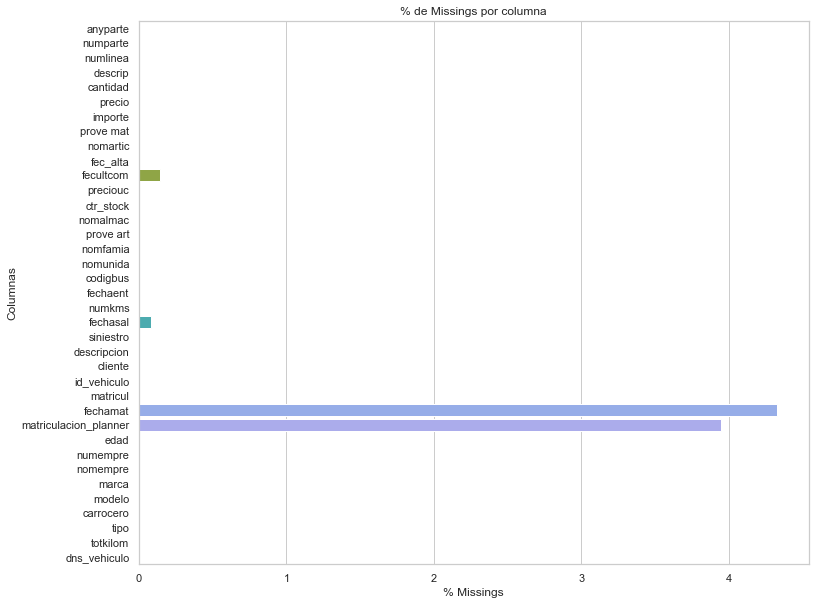

In [88]:
plot_miss(missings_df)

In [89]:
col_date=df.select_dtypes(include=np.datetime64).columns.tolist()
col_date

['fec_alta',
 'fecultcom',
 'fechaent',
 'fechasal',
 'fechamat',
 'matriculacion_planner']

eliminamos las filas con Missings en la fecha

In [90]:
df= df.dropna(axis=0)#subset=['codigbus'])
print(df.isna().sum().sum())

0


In [91]:
df.shape

(94772, 37)

In [92]:
df.columns

Index(['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'fecultcom', 'preciouc',
       'ctr_stock', 'nomalmac', 'prove art', 'nomfamia', 'nomunida',
       'codigbus', 'fechaent', 'numkms', 'fechasal', 'siniestro',
       'descripcion', 'cliente', 'id_vehiculo', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 'marca',
       'modelo', 'carrocero', 'tipo', 'totkilom', 'dns_vehiculo'],
      dtype='object')

In [93]:
pd.unique(df['dns_vehiculo'])

array(['bunyol', 'tviacentro', 'transvia', 'laserranica', 'lamarina',
       'SIN ASIGNAR', 'fernanbus', 'maganeto', 'therpasa', 'ambulancias'],
      dtype=object)

In [94]:
dns = df.groupby('dns_vehiculo')['dns_vehiculo'].count().sort_values(ascending=False)

Total dns :  94772 
 dns_vehiculo
transvia       27433
bunyol         26194
fernanbus      15903
SIN ASIGNAR    14065
lamarina        4702
tviacentro      3954
laserranica     2493
maganeto          14
ambulancias       13
therpasa           1
Name: dns_vehiculo, dtype: int64


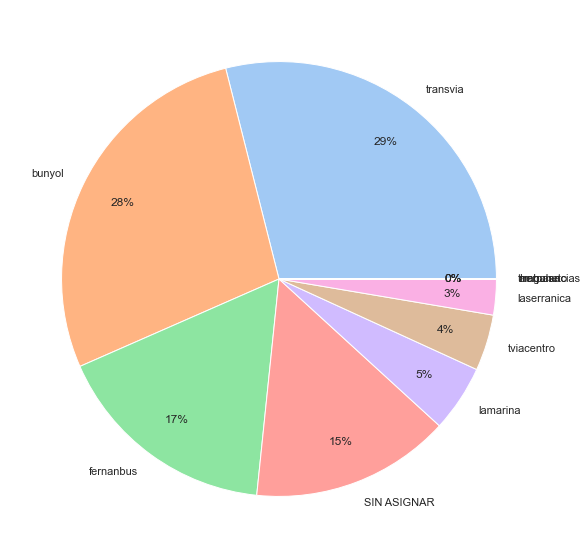

In [95]:
colors = sns.color_palette('pastel')[0:23]
plt.figure(figsize=(10,10))

#create pie chart
plt.pie(dns ,labels=dns .index, colors = colors, autopct='%1.00f%%', pctdistance=0.8) #'%.0f%%')
print('Total dns : ', dns.sum(),'\n', dns)

plt.show()

In [96]:
df[(df['dns_vehiculo']=='transvia')].shape

(27433, 37)

In [97]:
df.sample(5)

,anyparte,numparte,numlinea,descrip,cantidad,precio,importe,prove mat,nomartic,fec_alta,fecultcom,preciouc,ctr_stock,nomalmac,prove art,nomfamia,nomunida,codigbus,fechaent,numkms,fechasal,siniestro,descripcion,cliente,id_vehiculo,matricul,fechamat,matriculacion_planner,edad,numempre,nomempre,marca,modelo,carrocero,tipo,totkilom,dns_vehiculo
89364,2018,1808470,13,LIQUIDO LIMPIACRISTALES CON ANTICONGELAN,1.0,1.4195,1.42,"VEDAT MEDITERRANEO SERVICIOS, S.L.",LIQUIDO LIMPIACRISTALES CON ANTICONGELANTE,2015-11-24,2021-12-20,1.6815,0,ALMACEN QUART,"VEDAT MEDITERRANEO SERVICIOS, S.L.",MATERIAL LIMPIEZA,UNIDADES,E661,2018-09-06,60500,2018-09-14,0,"VEDAT MEDITERRANEO SERVICIOS, S.L.","VEDAT MEDITERRANEO SERVICIOS, S.L.",114.0,3829KHV,2018-02-27,2018-02-27,4.0,10,Autos Diamond,FORD,MONDEO,SIN ASIGNAR,TURISMO,2077712.0,transvia
58886,2021,2100939,1,VALVULA CUADRUPLE,1.0,257.0000,179.90,"RS TURIA, S.L.",VALVULA CUADRUPLE,2009-08-04,2021-09-16,179.9000,1,ALMACEN QUART,"RS TURIA, S.L.",BOMBAS AGUA Y VALVULAS,UNIDADES,F193,2021-02-08,396000,2021-02-08,0,"RS TURIA, S.L.","RS TURIA, S.L.",901.0,7050CBK,2002-10-28,2002-10-28,20.0,95,Fernanbus,SCANIA,HABIT,TATA HISPANO,Urbano,0.0,fernanbus
62292,2020,2003199,16,"ABRAZADERA PERFILADA 55X11X1,2-4,35",1.0,18.8500,16.78,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL","ABRAZADERA PERFILADA 55X11X1,2-4,35",2019-10-23,2022-06-02,15.7850,1,ALMACEN QUART,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",ELEMENTOS MOTOR,UNIDADES,J307,2020-02-24,477401,2020-03-07,0,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL","MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",153.0,7543HXF,2014-05-15,2014-05-15,8.0,8,HOSOJU,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,-1.0,SIN ASIGNAR
24264,2020,2002409,3,PALANCA DE FRENO IZQUIERDA,1.0,95.0000,95.00,EUROPART,PALANCA DE FRENO IZQUIERDA,2020-03-06,2020-03-02,95.0000,1,ALMACEN QUART,EUROPART,FRENOS,UNIDADES,F124,2020-03-06,333863,2020-03-06,0,EUROPART,EUROPART,881.0,5105CVP,2004-04-30,2004-04-30,18.0,95,Fernanbus,SCANIA,CS40 CITY II,CASTROSUA,Urbano,1000001.0,fernanbus
95682,2020,2001641,8,COMPROBAR MASAS U.C. SRS,0.6,68.0000,40.80,MERCEDES-BENZ VALENCIA,COMPROBAR MASAS U.C. SRS,2020-03-29,2020-02-25,68.0000,0,ALMACEN QUART,MERCEDES-BENZ VALENCIA,MANO DE OBRA,UNIDADES,A358,2020-02-17,24090,2020-02-20,0,MERCEDES-BENZ VALENCIA,MERCEDES-BENZ VALENCIA,92.0,0942LBY,2019-10-22,2019-10-22,3.0,4,Cave Talleres,SIN ASIGNAR,SIN ASIGNAR,DYPETY,MICROBUS,200876.0,transvia


## Correlaciones

In [98]:
# from warnings import filterwarnings
# filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

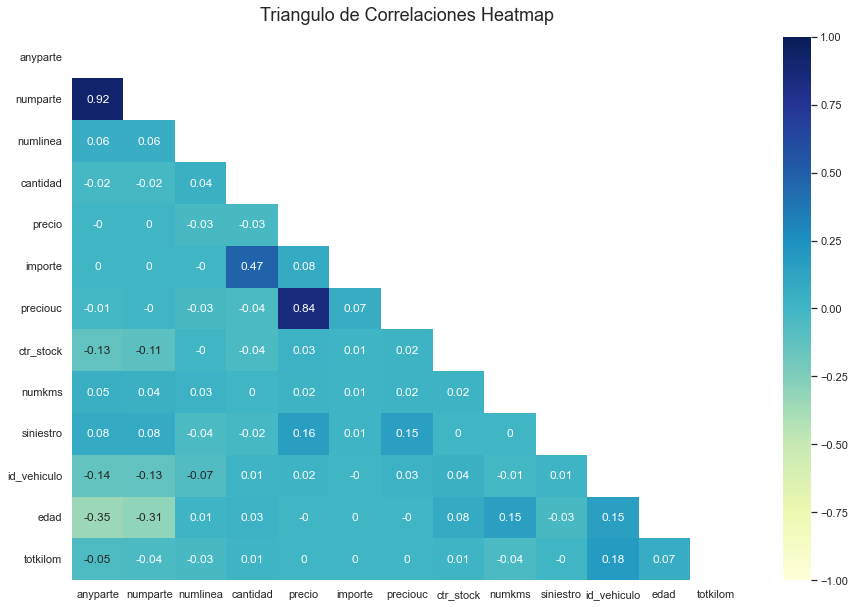

In [99]:
correlaciones(df)

In [100]:
# df.drop(df['totkilom']

In [101]:
df.columns

Index(['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'fecultcom', 'preciouc',
       'ctr_stock', 'nomalmac', 'prove art', 'nomfamia', 'nomunida',
       'codigbus', 'fechaent', 'numkms', 'fechasal', 'siniestro',
       'descripcion', 'cliente', 'id_vehiculo', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 'marca',
       'modelo', 'carrocero', 'tipo', 'totkilom', 'dns_vehiculo'],
      dtype='object')

# Graficos

 correlación entre pares

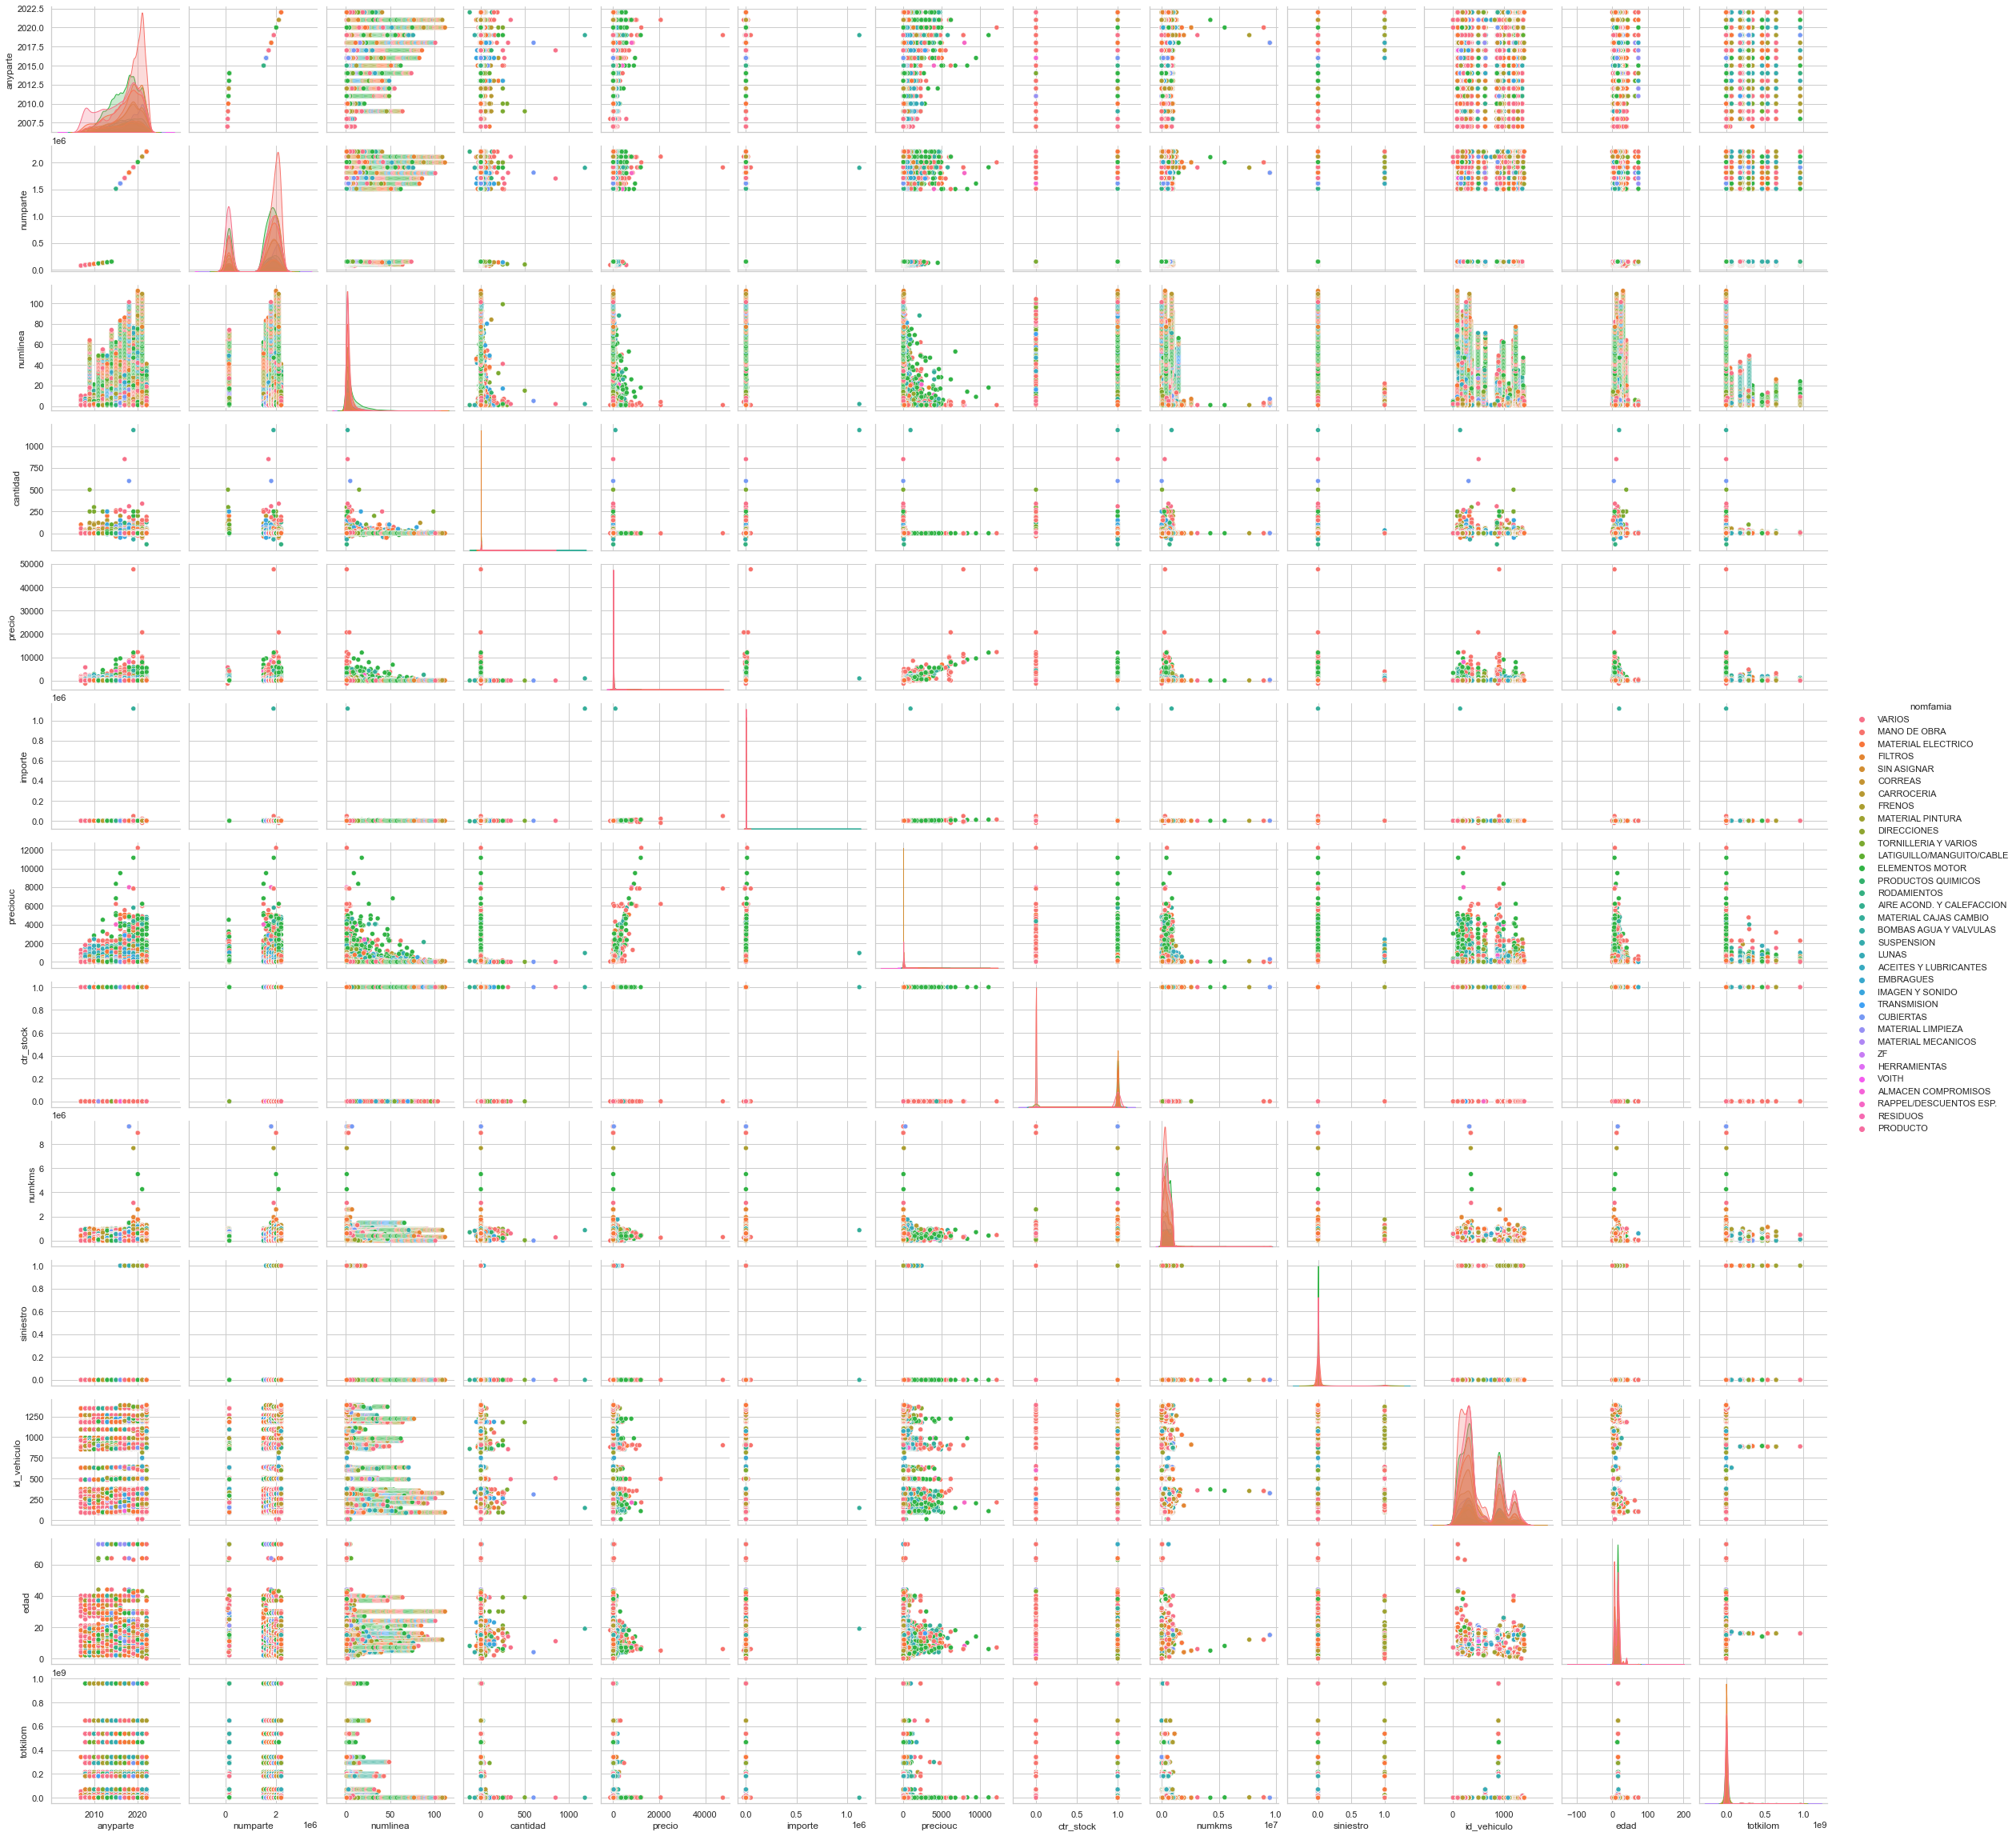

In [102]:
sns.pairplot(df,hue='nomfamia')
plt.show()

Mostramos el número de partes por año

Text(0.5, 0, 'Cantidad de observaciones')

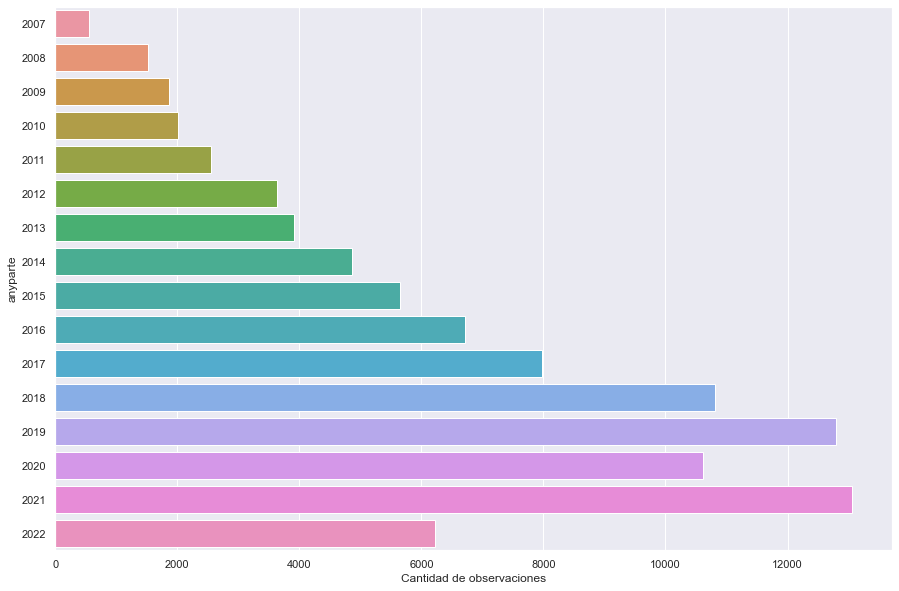

In [103]:
plt.figure(figsize=(15,10))
sns.set(style='darkgrid')

sns.countplot(y='anyparte',data=df)

plt.xlabel('Cantidad de observaciones') 

In [104]:
df1 = df.groupby('nomfamia').precio.mean()
df1

nomfamia
ACEITES Y LUBRICANTES          19.112900
AIRE ACOND. Y CALEFACCION     168.293889
ALMACEN COMPROMISOS             8.666974
BOMBAS AGUA Y VALVULAS        231.219237
CARROCERIA                     82.733815
CORREAS                        44.035804
CUBIERTAS                      94.263442
DIRECCIONES                   193.301912
ELEMENTOS MOTOR               168.791612
EMBRAGUES                     361.497803
FILTROS                        48.283001
FRENOS                        102.148659
HERRAMIENTAS                   34.385928
IMAGEN Y SONIDO               111.339064
LATIGUILLO/MANGUITO/CABLE      68.076207
LUNAS                        1013.711280
MANO DE OBRA                  106.789497
MATERIAL CAJAS CAMBIO         177.910924
MATERIAL ELECTRICO            112.007998
MATERIAL LIMPIEZA              10.061056
MATERIAL MECANICOS            218.315749
MATERIAL PINTURA               78.027868
PRODUCTO                        8.100000
PRODUCTOS QUIMICOS             18.712708
RAPPEL/

Mostramos la media de precios por famila de avería

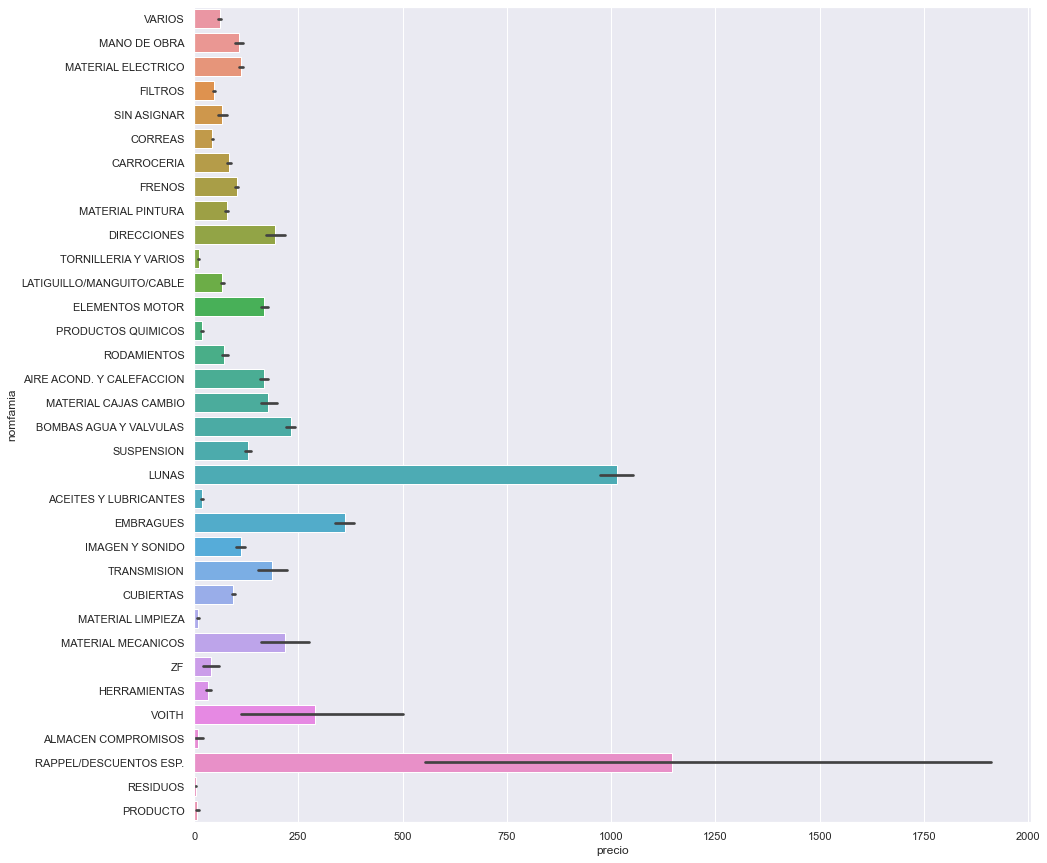

In [105]:
plt.figure(figsize=(15,15))
sns.set(style='darkgrid')

sns.barplot(x='precio',y='nomfamia',data=df)

#plt.xlabel('Cantidad de observaciones') 
plt.show()

In [106]:
df2=df.groupby('siniestro').precio.mean()



media de preciossi es siniestro o no

siniestro
0    106.973902
1    518.976533
Name: precio, dtype: float64


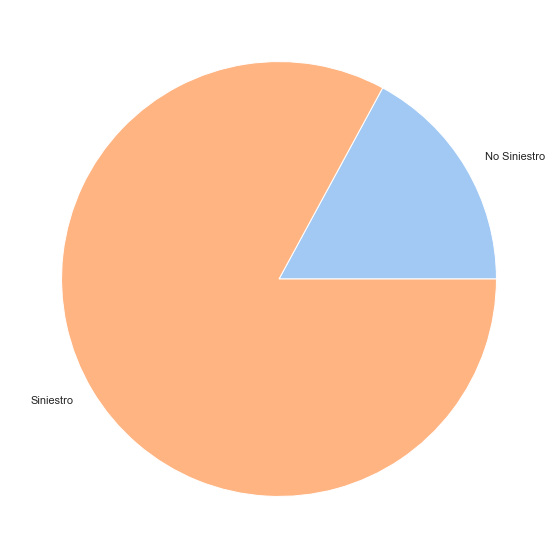

In [107]:
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(10,10))
sin=['No Siniestro','Siniestro']
#create pie chart
plt.pie(df2,labels=sin, colors = colors)#, autopct='%.0f%%')
print(df2)
plt.show()

In [108]:


df4=df.groupby('codigbus')['codigbus'].count()
df4=df4.sort_values()
filtered = df4[(df4 >= 700)]
filtered.count()

11

In [109]:
values= list(map(str,filtered))
values
#list(map(str, values))

['709', '717', '722', '723', '744', '769', '808', '834', '931', '1296', '1362']

codigbus
D113     709
A109     717
T251     722
D112     723
E651     744
F176     769
I707     808
T227     834
H094     931
T241    1296
T222    1362
Name: codigbus, dtype: int64


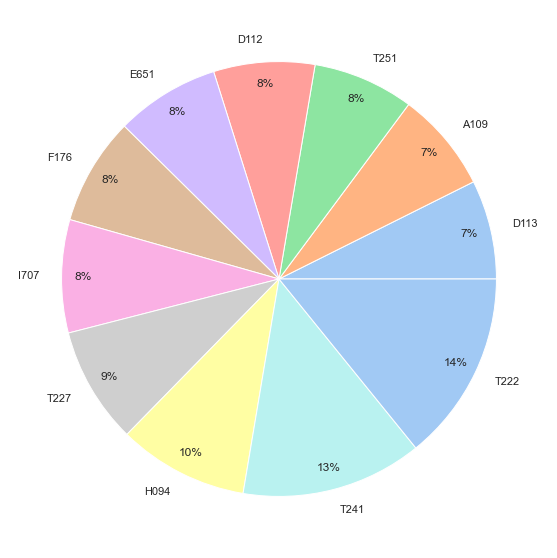

In [110]:
colors = sns.color_palette('pastel')[0:23]
plt.figure(figsize=(10,10))

#create pie chart
plt.pie(filtered ,labels=filtered .index, colors = colors, autopct='%1.00f%%', pctdistance=0.9) #'%.0f%%')
print(filtered )

plt.show()

In [111]:
df3=df.groupby('nomempre').precio.sum()
df3=df3.sort_values(ascending=False)

Gasto total  repartido por las empresas

nomempre
Fernanbus                1.543314e+06
Transvia                 1.503989e+06
Buñol                    1.415371e+06
Herca                    1.272601e+06
La Marina Gandiense      6.389400e+05
La Hispano Chelvana      5.564673e+05
Viajes Transvia          5.493517e+05
La Concepcion            4.995100e+05
HOSOJU                   4.988062e+05
Autos Diamond            4.719706e+05
Transvia Toledo          4.445672e+05
Starbus                  3.376467e+05
Medtrast                 3.174065e+05
La Serranica             2.827965e+05
Urbanos de Torrent       2.336184e+05
Travicoi                 2.219129e+05
Cave Talleres            1.044644e+05
Escartin                 1.620000e+03
Ambulancias Autónomas    8.535500e+02
Magallon                 5.975600e+02
Ambulancias Edetanas     3.742500e+02
NOC RENTING              3.209200e+02
J. Aguilar               1.285300e+02
Name: precio, dtype: float64

Total = 10896627.4529



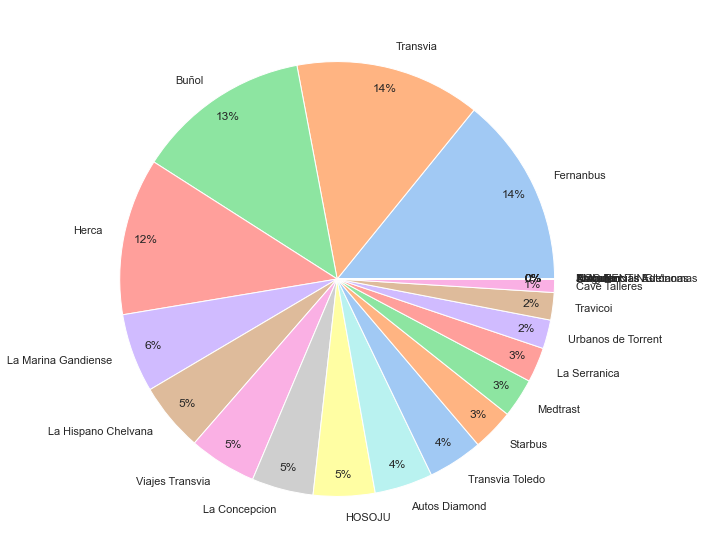

In [112]:
colors = sns.color_palette('pastel')[0:23]
plt.figure(figsize=(10,10))

#create pie chart
plt.pie(df3,labels=df3.index, colors = colors, autopct='%.0f%%', pctdistance=0.9)
print(df3)
print(f'\nTotal = {df3.sum()}\n')
plt.show()

Media de los gasto por empresa

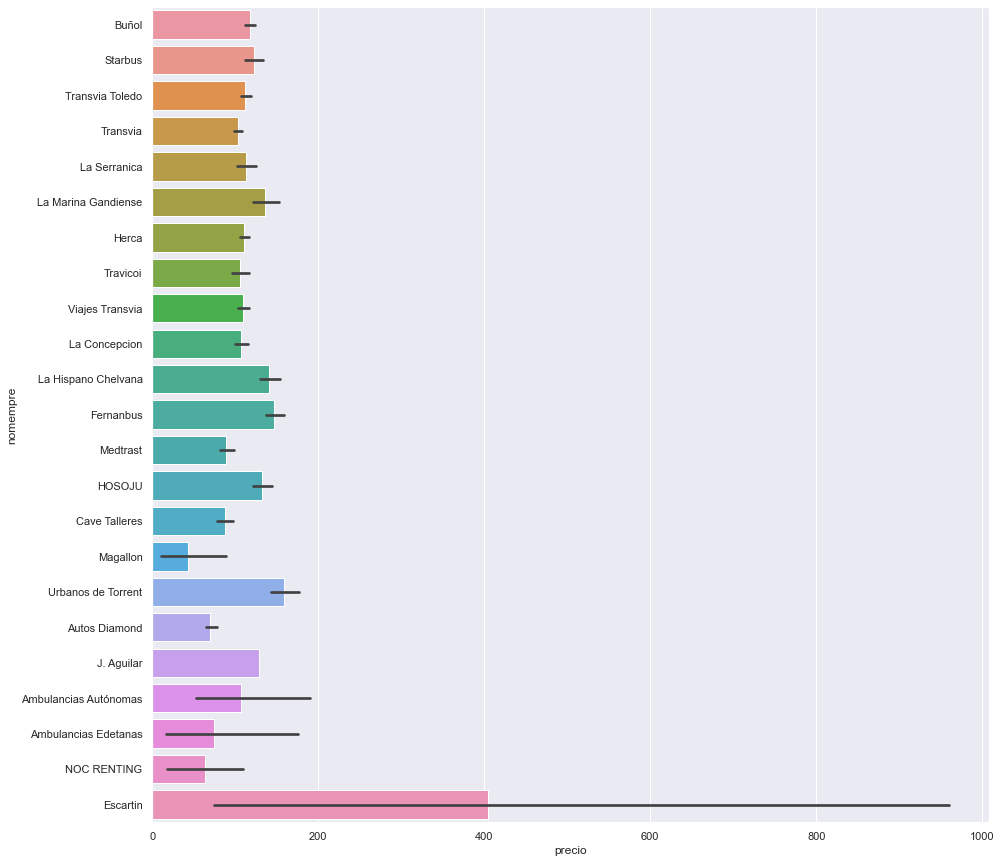

In [113]:
plt.figure(figsize=(15,15))
sns.set(style='darkgrid')

sns.barplot(x='precio',y='nomempre',data=df)

#plt.xlabel('Cantidad de observaciones') 
plt.show()

distibución de 'anyparte'

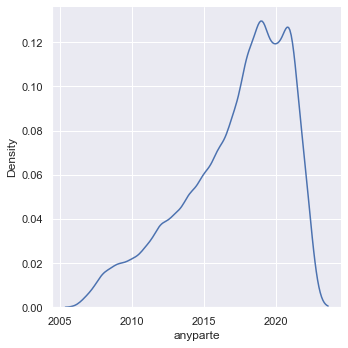

In [114]:
#fig, ax = plt.subplots(figsize=(8, 6))
#sns.displot(df['anyparte'], kde=True, bins=40, rug=True)
sns.displot(df['anyparte'], kind="kde", bw_adjust=1.5)
plt.show()

 relación entre cantidad  e importe

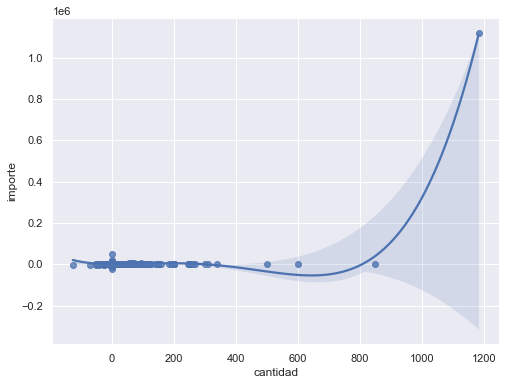

In [115]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="cantidad", y="importe", data=df, order=4)

plt.show()

relación entre preciouc y precio

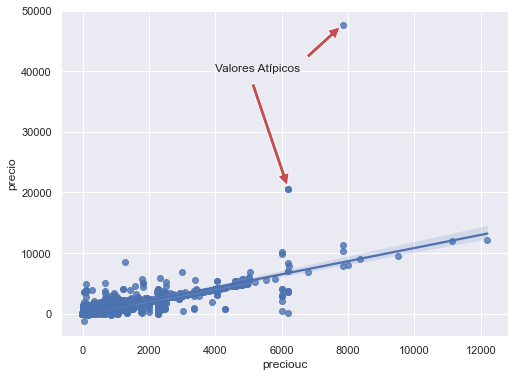

In [116]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="preciouc", y="precio",data=df, order=1)
ax.annotate('Valores Atípicos', xy=(7900, 48000), xytext=(4000, 40000), arrowprops = dict(facecolor='r', shrink=0.1))
ax.annotate('', xy=(6300, 19000), xytext=(5000, 40000), arrowprops = dict(facecolor='r', shrink=0.1))
plt.show()

relación entr epreciuc y la la edad

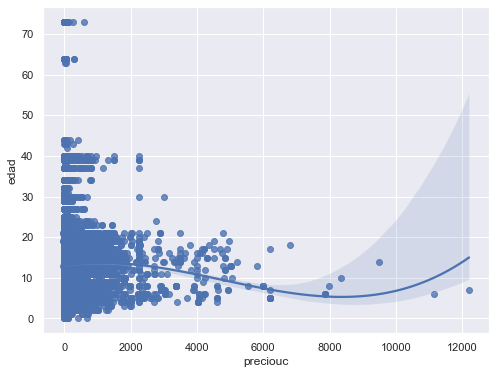

In [117]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="preciouc", y="edad", data=df, order=3)
plt.show()

In [118]:
#sns.pairplot(df, hue='ctr_stock')
#plt.show()

In [119]:
#sns.pairplot(df,hue='nomfamia')
#plt.show()